<a href="https://colab.research.google.com/github/javergara/test/blob/master/FalconCV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FalconCV

FalconCV is an open-source python library that offers developers an interface to interact with some of the most popular computer vision frameworks, such as Tensorflow Object detection API and Detectron. The main objective behind it is to unify the set of tools available and simplify the use of them. This library is focused mainly on Computer Vision practitioners but also is flexible enough to allow researchers to configure the models at a low-level. Additionally, taking advantage of the fantastic features that OpenVINO offers, a custom model can be trained and optimized to run efficiently in the target hardware with just a few lines of code. It is important to say that FalconCV does not attempt to replace any of the tools mentioned previously; instead, it takes the best of them and offers a solution to improve accessibility to new users. FalconCV still in betha, but the test installer is here : https://test.pypi.org/project/falconcv.

## Check Tensorflow Version and GPU Support



## Install FalconCV Dependencies

In [0]:
!pip install matplotlib
!pip install numpy
!pip install opencv-contrib-python
!pip install pillow
!pip install colorama
!pip install tqdm
!pip install scipy
!pip install more-itertools
!pip install pandas
!pip install validators
!pip install imutils
!pip install boto3
!pip install "dask[complete]" 
!pip install Mako
!pip install pick
!pip install clint
!pip install colorlog
!pip install gitpython

## Install FalconCV

In [0]:
!pip uninstall falconcv && pip install -i https://test.pypi.org/simple/ falconcv

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


## Create Dataset

In [0]:

from falconcv.ds import *
from falconcv.util import FileUtil,ImageUtil
from falconcv.ds import BoxRegion
import os
def create_dataset(images_folder , labels, n):
    try:
        dataset=Coco(v=2017)
        dataset.setup(split="train",task="segmentation")
        os.makedirs(images_folder,exist_ok=True)
        FileUtil.clear_folder(images_folder)
        for batch_images in dataset.fetch(
                n=n,
                labels=labels,
                batch_size=500):
            # export the batch of images to the disk
            PascalVOC(batch_images).encode(images_folder)
            for img in batch_images:
                for region in img.regions:
                    if isinstance(region, BoxRegion):
                        print(region.shape_attributes["x"],
                              region.shape_attributes["y"])
    except Exception as ex:
        print("Error downloading the images {} ".format(ex))

In [0]:
create_dataset(images_folder="images", labels=["elephant", "giraffe"], n=1000)

## Train Model


In [0]:
from falconcv.models import ModelBuilder
import falconcv as fcv
config={
    "model": "faster_rcnn_inception_v2_coco",
    "images_folder": r"images",
    "out_folder": r"mymodel"
}
with ModelBuilder.build(config=config) as model:
    model.train(epochs=3000, val_split = 0.3, clear_folder=True).freeze(checkpoint=3000)
    

# Test the model

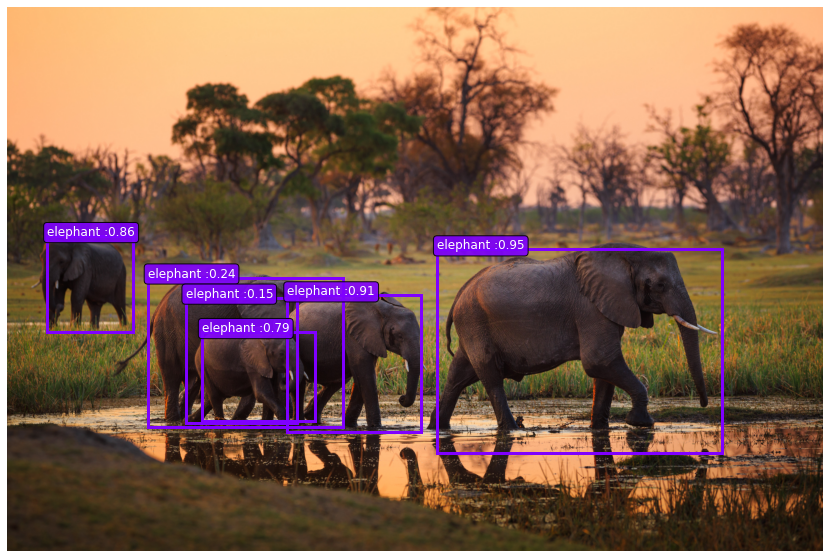

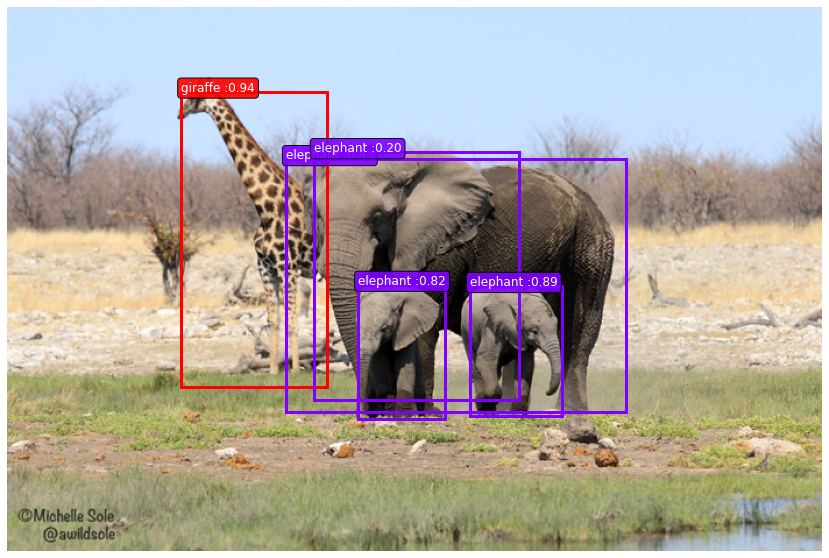

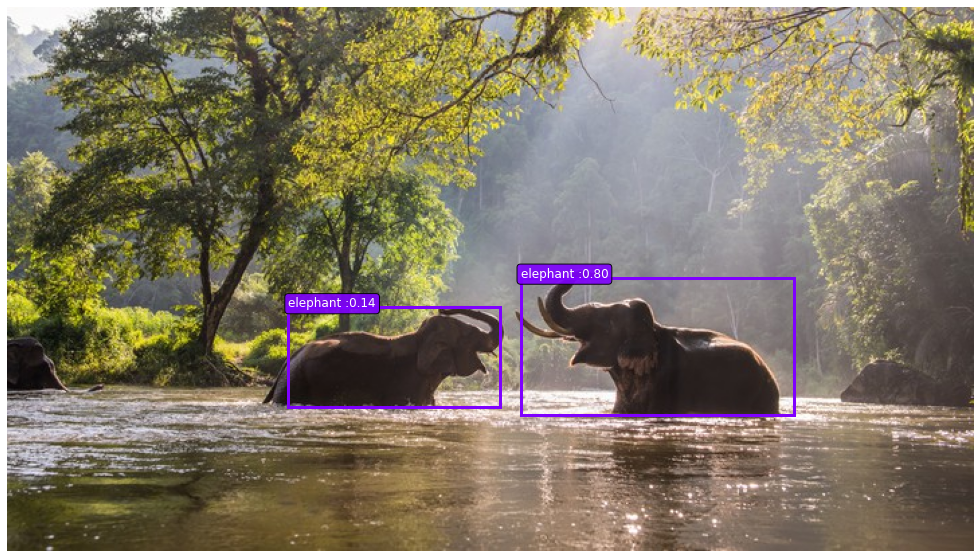

In [0]:
%matplotlib inline
from falconcv.models import ModelBuilder
from falconcv.util import VIUtil
frozen_model = "mymodel/export/frozen_inference_graph.pb"
labels_map_file = "mymodel/label_map.pbtx"
test_images = [
    "https://images.theconversation.com/files/235364/original/file-20180907-90549-g1j53a.jpg",
    "https://africageographic.com/wp-content/uploads/2016/10/giraffe-and-elephant-watering-hole.jpg",
    "https://cdn.theatlantic.com/thumbor/c1-ZtNGbGMIzwbyJWZMEt3RIW8o=/0x558:6933x4467/720x405/media/img/mt/2018/12/GettyImages_863671188/original.jpg"]
with ModelBuilder.build(frozen_model,labels_map_file) as model:
    for image_uri in test_images:
        img,predictions=model.predict(image_uri, threshold=0.1)
        VIUtil.imshow(img, predictions)